C:\Users\VIPIND~1\AppData\Local\Temp/ipykernel_8464/799229418.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  return pd.datetime.strptime('190'+x, '%Y-%m')


       t    t+1
0    NaN  266.0
1  266.0  145.9
2  145.9  183.1
3  183.1  119.3
4  119.3  180.3
Test RMSE: 133.156


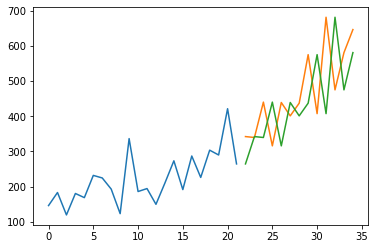

In [1]:
#evaluate a persistence forecast model
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

# load dataset
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')
series = pd.read_csv('shampoo_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)

# create lagged dataset
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
print(dataframe.head(5))
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
def model_persistence(x):
    return x
# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
# plot predictions and expected results
plt.plot(train_y)
plt.plot([None for i in train_y] + [x for x in test_y])
plt.plot([None for i in train_y] + [x for x in predictions])
plt.show()

In [2]:
# calculate residuals from a persistence forecast
series = pd.read_csv('daily_total_female_births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# create lagged dataset
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
predictions = [x for x in test_X]
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = pd.DataFrame(residuals)
print(residuals.head())

      0
0   9.0
1 -10.0
2   3.0
3  -6.0
4  30.0


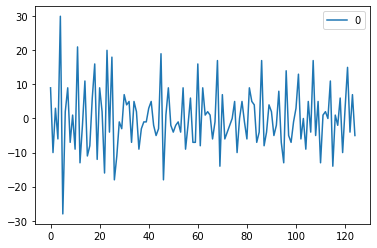

In [3]:
# plot residuals
residuals.plot()
plt.show()

In [4]:
# summary statistics
print(residuals.describe())

                0
count  125.000000
mean     0.064000
std      9.187776
min    -28.000000
25%     -6.000000
50%     -1.000000
75%      5.000000
max     30.000000


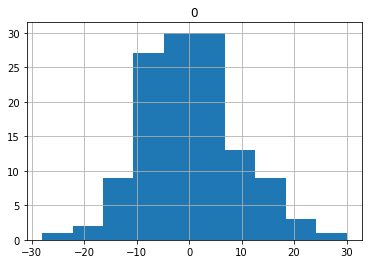

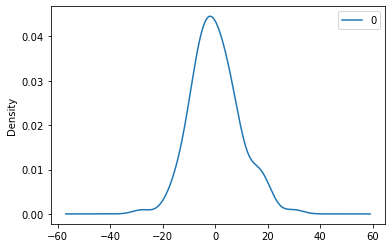

In [5]:
# histogram plot
residuals.hist()
plt.show()

# density plot
residuals.plot(kind='kde')
plt.show()

We can see that the distribution does have a Gaussian look, but is perhaps more pointy,
showing an exponential distribution with some asymmetry. If the plot showed a distribution
that was distinctly non-Gaussian, it would suggest that assumptions made by the modeling
process were perhaps incorrect and that a different modeling method may be required. A large
skew may suggest the opportunity for performing a transform to the data prior to modeling,
such as taking the log or square root.

In [6]:
from statsmodels.graphics.gofplots import qqplot

C:\Users\Vipin Dubey\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


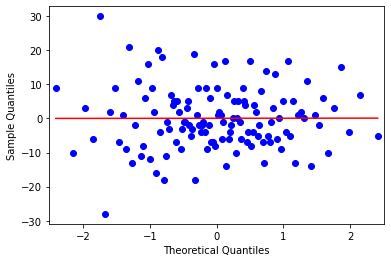

In [7]:
import numpy as np
residuals = np.array(residuals)
qqplot(residuals, line='r')
plt.show()

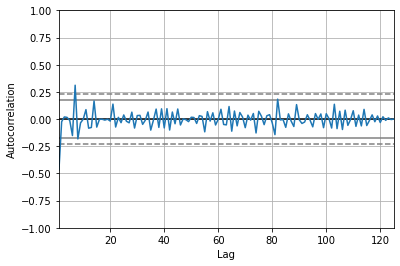

In [8]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(residuals)
plt.show()

Running the example creates an autoregression plot of other residual errors. We do not see
an obvious autocorrelation trend across the plot. There may be some positive autocorrelation
worthy of further investigation at lag 7 that seems significant.